In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy import fftpack
from scipy import stats
from scipy.stats import norm

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

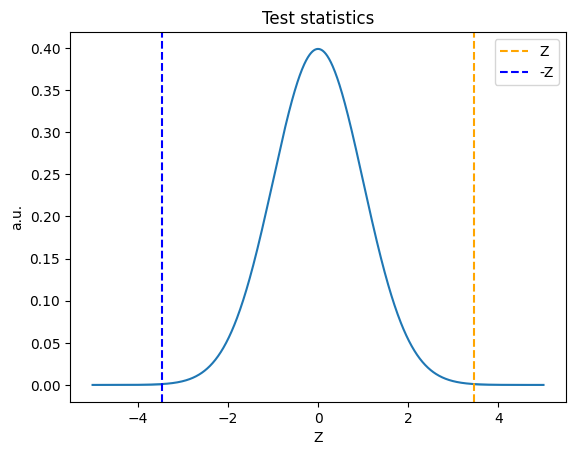

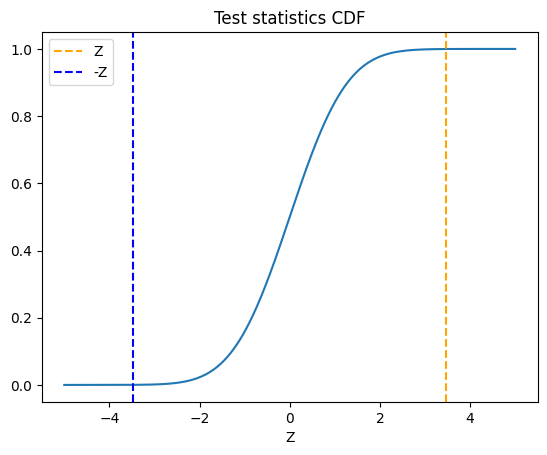

Z score = 3.5
p-value (for Z = 3.5 ) = 0.0005
p-value (for Z = 3) = 0.0027
The probability that in a year are observed 15 or more hurricances is 0.0005%. I reject the null hypothesis:the difference between the number of hurricanes in 2005 and the historic average is statistically significant.


In [2]:
x0 = 15
mu = 6.3

sigma_mu = np.sqrt(mu)
Z = abs(x0-mu)/sigma_mu


xs = np.linspace(-5, +5, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange', label='Z')
plt.axvline(-Z, linestyle='--', color='blue', label='-Z')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("Z")
plt.legend()
plt.show()


cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange', label='Z')
plt.axvline(-Z, linestyle='--', color='blue', label='-Z')
plt.title("Test statistics CDF")
plt.xlabel("Z")
plt.legend(loc = 'best')
plt.show()


pvalue_Z3 = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print('Z score = %.1f' %Z)
print('p-value (for Z = %.1f' %Z, ') = %.4f' %pvalue)
print('p-value (for Z = 3) = %.4f' %pvalue_Z3)

if pvalue < pvalue_Z3:
    print('The probability that in a year are observed 15 or more hurricances is %.4f%%. I reject the null hypothesis:the difference between the number of hurricanes in 2005 and the historic average is statistically significant.' %pvalue)
else:
    print('The probability that in a year are observed 15 or more hurricances is %.4f%%. I accept the null hypothesis.' %pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T-students =  -0.6364911480330102


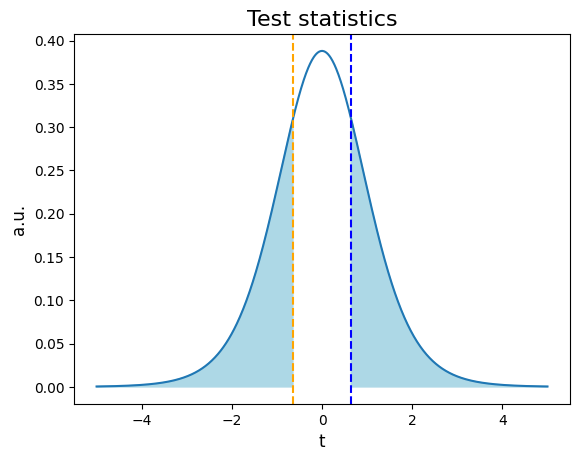

p-value = 0.5403044785184816
I accept the null hyphotesis.The change in blood pressures is statistically significant


In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
pre_mean = np.mean(pre)
post_mean = np.mean(post)
pre_sigma = np.sqrt(np.var(pre, ddof=1))
post_sigma = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((pre_sigma**2+post_sigma**2)/2)
n = len(pre)
T = (pre_sigma-post_sigma)/(sigma*np.sqrt(2/n))
print("T-students = ",T)


xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics",fontsize=16)
plt.ylabel("a.u.",fontsize=12)
plt.xlabel("t",fontsize=12)
plt.show()


pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

if(pvalue<=0.05):
    print("I reject the null hyphotesis.The change in blood pressures is not statistically significant")
else:
    print("I accept the null hyphotesis.The change in blood pressures is statistically significant")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Parameters for the maximum temperatures
A = 10.58 +- 0.41
fac = 0.59 +- 0.02
phi = 10.26 +- 0.15
offset = 27.95 +- 0.43
Parameters for the minimum temperatures
A = 25.15 +- 1.31
fac = 0.60 +- 0.02
phi = 10.57 +- 0.16
offset = -36.71 +- 1.19


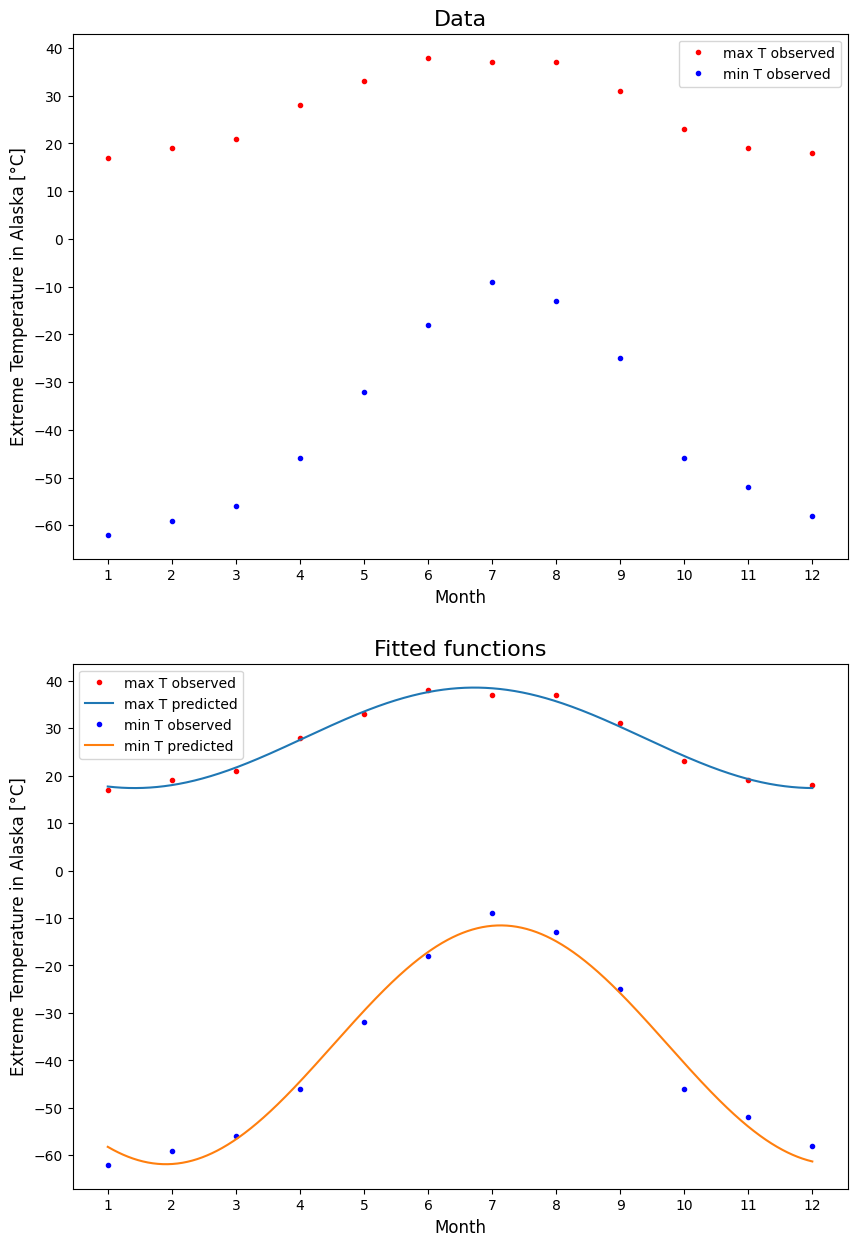

In [5]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

t_max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
t_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(1,13)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
x = np.linspace(1,12, 1000)

ax1.plot(months, t_max, 'r.', label = 'max T observed')
ax1.plot(months, t_min, 'b.', label = 'min T observed')
ax1.set_title("Data", fontsize = 16)
ax1.set_xlabel("Month",fontsize = 12)
ax1.set_ylabel("Extreme Temperature in Alaska [°C]", fontsize = 12)
ax1.set_xticks(months)
ax1.set_yticks(np.arange(-60, 50, 10.))
ax1.legend()

def sinfunc(x, A, fac, phi, offset):
    return A * np.cos(fac*(x) - phi) + offset

param_max, cov_max = optimize.curve_fit(sinfunc, months, t_max, p0=[25, 0.5, 10, 27])

print("Parameters for the maximum temperatures")
print("A = %.2f +- %.2f" % (param_max[0], np.sqrt(cov_max[0,0])))
print("fac = %.2f +- %.2f" % (param_max[1], np.sqrt(cov_max[1,1])))
print("phi = %.2f +- %.2f" % (param_max[2], np.sqrt(cov_max[2,2])))
print("offset = %.2f +- %.2f" % (param_max[3], np.sqrt(cov_max[3,3])))


param_min, cov_min = optimize.curve_fit(sinfunc, months, t_min, p0=[10, 0.5, 10, -36])

print("Parameters for the minimum temperatures")
print("A = %.2f +- %.2f" % (param_min[0], np.sqrt(cov_min[0,0])))
print("fac = %.2f +- %.2f" % (param_min[1], np.sqrt(cov_min[1,1])))
print("phi = %.2f +- %.2f" % (param_min[2], np.sqrt(cov_min[2,2])))
print("offset = %.2f +- %.2f" % (param_min[3], np.sqrt(cov_min[3,3])))

ax2.plot(months, t_max, 'r.', label = 'max T observed')
ax2.plot(x, sinfunc(x, *param_max), label = 'max T predicted')
ax2.plot(months, t_min, 'b.', label = 'min T observed')
ax2.plot(x, sinfunc(x, *param_min), label = 'min T predicted')
ax2.set_title("Fitted functions", fontsize = 16)
ax2.set_xlabel("Month",fontsize = 12)
ax2.set_ylabel("Extreme Temperature in Alaska [°C]",fontsize = 12)
ax2.set_xticks(months)
ax2.set_yticks(np.arange(-60, 50, 10.))
ax2.legend(loc = "best")
#The fit is reasonable

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

0        1.100000
1       -1.950000
2       -7.200000
3       -4.150000
4       -6.590000
           ...   
11126   -0.760000
11127    0.380000
11128    0.083333
11129    0.166667
11130    0.083333
Name: residuals, Length: 11131, dtype: float64
Parameters :
Amplitude = 11921 +- 900
Centroid = -3 +- 0
Standard deviation = 2.53 +- 0.15
Offset = 5.12 +- 2.55


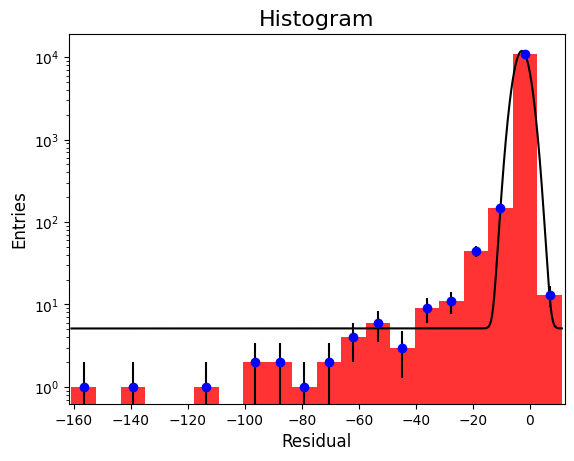

In [6]:
filename="residuals_261.pkl"
data=np.array(np.load(filename, allow_pickle = True))
df=pd.DataFrame(data[()])
print(df["residuals"])
plt.title("Histogram",fontsize=16)
plt.xlabel("Residual",fontsize=12)
plt.ylabel("Entries",fontsize=12)
plt.yscale("log")
y,binEdges = np.histogram(df['residuals'],bins=20)
n_i, bins, patches=plt.hist(df['residuals'], bins=20, color='r', alpha=0.8)
bin_center = (bins[:-1] + bins[1:]) / (2.0)
plt.xlim(df['residuals'].min()-1,df['residuals'].max()+1)
sigma = np.sqrt(n_i)
plt.errorbar(bin_center, y, yerr=sigma, fmt='o', color='b', ecolor='black')


def gaussian(x, A, centroid, width, offset):
    return A * np.exp(-(x-centroid)**2 / (2*width**2)) + offset
mean, std = stats.norm.fit(df['residuals'])
x = np.linspace(df['residuals'].min(),df['residuals'].max(),1000)
param, cov = optimize.curve_fit(gaussian, bin_center, n_i, p0=[1000,mean,std,0])

print("Parameters :" )
print("Amplitude = %.0f +- %.0f" % (param[0], np.sqrt(cov[0,0])))
print("Centroid = %.0f +- %.0f" % (param[1], np.sqrt(cov[1,1])))
print("Standard deviation = %.2f +- %.2f" % (param[2], np.sqrt(cov[2,2])))
print("Offset = %.2f +- %.2f" % (param[3], np.sqrt(cov[3,3])))
    
plt.plot(x, gaussian(x, *param),color='black')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [7]:
with open("munich_temperatures_average_with_bad_data.txt", "r") as f:
    data = f.read().replace(" ", ",")
#print(data)
with open('new_data.txt', 'w') as my_list_file:
  my_list_file.writelines("%s\n" % data)

            TIME  TEMPERATURE
4748  2008.00274     -2.94444
4749  2008.00548     -2.66667
4750  2008.00821     -2.66667
4751  2008.01095     -2.00000
4752  2008.01369     -1.94444
...          ...          ...
6204  2011.98836      3.44444
6205  2011.99110      1.27778
6206  2011.99384      2.88889
6207  2011.99658      1.83333
6208  2011.99932      1.50000

[1461 rows x 2 columns]

Parameters for f(t) function:

a = 9.99 +- 0.18
b = 2.91 +- 0.02
c = 9.38 +- 0.13
The average temperature in Munich is:  9.384097734976043
The average temperature predicted for the hottest time of the year is:  19.372195579960376
The average temperature predicted for the coldest time of the year is:  -0.603738887677645
Parameters for g(t) function:

a = 1.30 +- 0.32
b = 1.64 +- 0.03
c = 4600.18 +- 422.22
d = 9.43 +- 0.22

The RSS for f(t) is:  34359.85859996652
The RSS for g(t) is:  106007.11857094444

Fisher test
3 vs 4 parameters:
p-value: 1.000 , additional parameter necessary: NO


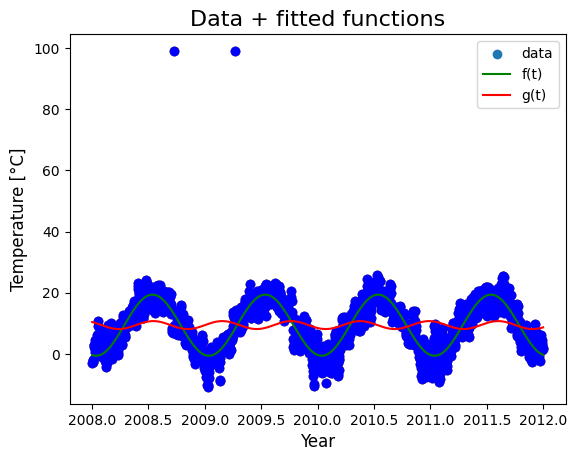

In [8]:
file_name = "new_data.txt"
df = pd.read_csv(file_name)
clean_df = df[(df['TIME'] < 2012.00001) & (df['TIME'] > 2007.99999)]
print(clean_df)

plt.plot(clean_df['TIME'],clean_df['TEMPERATURE'],'o',color = 'blue')

def f(t, a, b, c):
        return a * np.cos(2*np.pi*t+b) + c
    
param, cov = optimize.curve_fit(f, clean_df['TIME'], clean_df['TEMPERATURE'], p0=[10, 3,9], full_output=False)
print("\nParameters for f(t) function:\n")
print("a = %.2f +- %.2f" % (param[0], np.sqrt(cov[0,0])))
print("b = %.2f +- %.2f" % (param[1], np.sqrt(cov[1,1])))
print("c = %.2f +- %.2f" % (param[2], np.sqrt(cov[2,2])))
plt.scatter(clean_df['TIME'], clean_df['TEMPERATURE'], label='data')
plt.plot(clean_df['TIME'], f(clean_df['TIME'], param[0], param[1],param[2]), color='green', label='f(t)')

temp_mean = clean_df["TEMPERATURE"].mean()
print("The average temperature in Munich is: ",temp_mean)
temp = f(clean_df['TIME'], *param)

print('The average temperature predicted for the hottest time of the year is: ', temp.max())
print('The average temperature predicted for the coldest time of the year is: ', temp.min())
#second function
def g(t, a, b, c, d):
        return a * np.cos(2*np.pi*b*t+c) + d
    
param1, cov1 = optimize.curve_fit(g, clean_df['TIME'], clean_df['TEMPERATURE'], p0=[-0.5, 2, 2, 9], full_output=False)
print("Parameters for g(t) function:\n")
print("a = %.2f +- %.2f" % (param1[0], np.sqrt(cov1[0,0])))
print("b = %.2f +- %.2f" % (param1[1], np.sqrt(cov1[1,1])))
print("c = %.2f +- %.2f" % (param1[2], np.sqrt(cov1[2,2])))
print("d = %.2f +- %.2f" % (param1[3], np.sqrt(cov1[3,3])))
plt.scatter(clean_df['TIME'], clean_df['TEMPERATURE'])
plt.plot(clean_df['TIME'], g(clean_df['TIME'], param1[0], param1[1],param1[2],param1[3]), color='red', label='g(t)')
plt.title("Data + fitted functions",fontsize=16)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Temperature [°C]",fontsize=12)
plt.legend(loc='best')
#Fisher


alpha = 0.05 


def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

ssr_1 = np.sum((f(clean_df['TIME'], param[0], param[1],param[2]) - clean_df['TEMPERATURE'])**2)
print()
print("The RSS for f(t) is: ",ssr_1)
ndof_1 = 3 - 1 # n of parameters - 1

ssr_2 = np.sum((g(clean_df['TIME'], param1[0], param1[1],param1[2],param1[3]) - clean_df['TEMPERATURE'])**2)
print("The RSS for g(t) is: ",ssr_2)
ndof_2 = 4 - 1 # n of parameters - 1
print()
print("Fisher test")
print("3 vs 4 parameters:")
pval_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, len(clean_df), verbose=True)
#the b parameter is the phase of the function\n"